In [1]:
import numpy as onp
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
n = 100  # Foreground sample size
m = 100  # Background sample size
p = 2    # Number of features
d = 1    # Latent dimension

onp.random.seed(1)
zx = onp.random.normal(size=(n, d))    # Foreground shared latent variables
zy = onp.random.normal(size=(m, d))    # Background shared latent variables
t = onp.random.normal(size=(n, d))     # Foreground-specific latent variables
# W = onp.random.normal(size=(d, p))     # Foreground-specific loadings matrix
# S = onp.random.normal(size=(d, p))     # Shared loadings matrix
# beta = onp.random.normal(size=(d, 1))  # Coefficient vector

W = [[-10.123,5.543]]     # Foreground-specific loadings matrix
S = [[1.908,2.67]]    # Shared loadings matrix
beta = [[1.103]]   # Coefficient vector
sigma = 2e-2                           # Data matrix noise variance
tau = 5e-1                             # Response noise variance

print('==S==')
print(S)
print('==W==')
print(W)
print('==beta==')
print(beta)

# Foreground data
X = zx @ S + t @ W + onp.random.normal(scale=sigma, size=(n, 2))
print(type(X))
print(X.shape)

# Background data
Y = zy @ S + onp.random.normal(scale=sigma, size=(m, 2))
print(type(Y))
print(Y.shape)

# Response
R = t @ beta + onp.random.normal(scale=tau, size=(n, 1))
print(type(R))
print(R)

==S==
[[1.908, 2.67]]
==W==
[[-10.123, 5.543]]
==beta==
[[1.103]]
<class 'numpy.ndarray'>
(100, 2)
<class 'numpy.ndarray'>
(100, 2)
<class 'numpy.ndarray'>
[[-0.83756862]
 [ 1.5207393 ]
 [-0.64990684]
 [ 2.88072522]
 [-1.70793312]
 [-1.92903949]
 [-2.49509378]
 [-0.33101504]
 [-1.41569033]
 [ 1.41497681]
 [-0.65635959]
 [-2.63342536]
 [ 1.21325584]
 [-0.59069203]
 [-1.22021019]
 [ 1.71510443]
 [ 0.5370804 ]
 [-0.07602926]
 [ 1.70863596]
 [ 0.04573822]
 [ 0.7450944 ]
 [ 1.02827378]
 [ 1.46737554]
 [ 0.12964912]
 [-1.98060846]
 [ 2.84315139]
 [-0.5479735 ]
 [-0.20460935]
 [-0.83993612]
 [ 0.30026507]
 [ 0.75077482]
 [ 0.58557711]
 [ 2.38964476]
 [ 1.67663784]
 [-0.32263118]
 [-1.86753402]
 [-1.0861038 ]
 [-1.07807093]
 [-3.19581885]
 [ 0.30333883]
 [-0.51340361]
 [ 0.16187724]
 [-0.78055708]
 [-1.84669339]
 [-1.01970785]
 [ 0.37993807]
 [ 0.94783056]
 [-0.48681822]
 [ 2.15765297]
 [-1.80282426]
 [ 0.38774727]
 [-0.25480374]
 [-2.43399794]
 [ 1.91759545]
 [ 0.69908394]
 [-1.49187398]
 [ 1

In [3]:
import sys

sys.path.append("../contrastive-regression/models")
from linear_cr import LinearCR
# Instantiate model
model = LinearCR()

# Fit model
model.fit(X, Y, R, d,learning_rate=1e-3)

# Make predictions on training data
preds = model.predict(X)

Step: 0               Log marginal lik.: -7786.62
Step: 200             Log marginal lik.: -5382.66
Step: 400             Log marginal lik.: -3847.9
Step: 600             Log marginal lik.: -3051.78
Step: 800             Log marginal lik.: -2573.14
Step: 1000            Log marginal lik.: -2250.51
Step: 1200            Log marginal lik.: -2015.97
Step: 1400            Log marginal lik.: -1836.49
Step: 1600            Log marginal lik.: -1693.99
Step: 1800            Log marginal lik.: -1577.74
Step: 2000            Log marginal lik.: -1480.91
Step: 2200            Log marginal lik.: -1398.96
Step: 2400            Log marginal lik.: -1328.72
Step: 2600            Log marginal lik.: -1267.91
Step: 2800            Log marginal lik.: -1214.87
Step: 3000            Log marginal lik.: -1168.32
Step: 3200            Log marginal lik.: -1127.27
Step: 3400            Log marginal lik.: -1090.96
Step: 3600            Log marginal lik.: -1058.76
Step: 3800            Log marginal lik.: -1030.16
S

In [4]:
print('==S==')
print(model.S)
print('==W==')
print(model.W)
print('==beta==')
print(model.beta)
print('==sigma_sq==')
print(model.sigma_sq)
print('==tau_sq==')
print(model.tau_sq)
print('==preds==')
print(preds)

==S==
[[1.7467341 2.4453177]]
==W==
[[-10.210888    5.4745297]]
==beta==
[[1.1296365]]
==sigma_sq==
[0.00065506]
==tau_sq==
[0.26528955]
==preds==
[-0.4566858   0.9286144  -0.631109    2.2014494  -1.502197   -1.9847379
 -1.8626493  -1.0070797  -1.2618243   2.2037332  -0.36859408 -1.5138046
  1.2554866  -0.6582096  -1.3917036   0.9872966   0.7037098  -0.4929559
  1.5866485   0.1469908   1.8237054   0.5673472   1.7561419   0.12328107
 -1.3761978   2.7587247  -0.6135812  -0.22342472 -0.789458   -0.22921132
  0.27538022  0.2309019   0.74590236  2.01494    -0.13622624 -1.3896961
 -1.3336614  -0.75228655 -1.8904285   0.9329848  -0.5625554  -0.34832108
 -0.00328161 -1.5734354  -0.9694022   0.76441514  0.6980863  -0.49683195
  2.043632   -1.4684895  -0.38647437 -0.2591997  -3.145597    2.1851528
  0.4132306  -1.1739806   2.3077335   0.6615254   0.48636794 -0.68673855
  0.12191985 -1.719037    0.89234775 -0.4206235   0.15045752  1.3534768
  0.3192363   0.29368287  0.3117733  -0.82519823  0.9392

In [5]:
_, _, r2_contrastivereg, _, _ = linregress(R.squeeze(), preds)
print(r2_contrastivereg)

0.9110381988600098


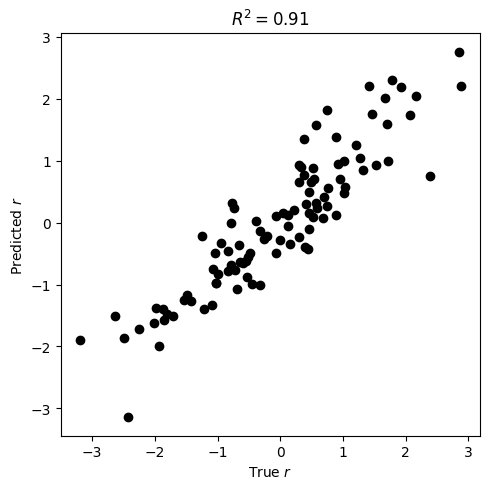

In [6]:
plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(R, preds, c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(r2_contrastivereg, 2)) + "$")

plt.tight_layout()
plt.show()

In [7]:
# update some code in BZ
import sys

sys.path.append("../contrastive-regression/models")
from linear_cr_bz import LinearCRBZ
# Instantiate model
newmodel = LinearCRBZ()

# Fit model
newmodel.fit(X, Y, R, d, seed=123)

# Make predictions on training data
newpreds = newmodel.predict(X)

Step: 0               Log marginal lik.: -6457.38
Step: 200             Log marginal lik.: -1377.13
Step: 400             Log marginal lik.: -1038.19
Step: 600             Log marginal lik.: -923.93
Step: 800             Log marginal lik.: -871.03
Step: 1000            Log marginal lik.: -841.88
Step: 1200            Log marginal lik.: -823.16
Step: 1400            Log marginal lik.: -809.34
Step: 1600            Log marginal lik.: -797.98
Step: 1800            Log marginal lik.: -788.09
Step: 2000            Log marginal lik.: -779.26
Step: 2200            Log marginal lik.: -771.21
Step: 2400            Log marginal lik.: -763.48
Step: 2600            Log marginal lik.: -754.73
Step: 2800            Log marginal lik.: -744.65
Step: 3000            Log marginal lik.: -732.47
Step: 3200            Log marginal lik.: -715.87
Step: 3400            Log marginal lik.: -691.7
Step: 3600            Log marginal lik.: -662.45
Step: 3800            Log marginal lik.: -629.35
Step: 4000        

In [8]:
print('==S==')
print(newmodel.S)
print('==W==')
print(newmodel.W)
print('==beta==')
print(newmodel.beta)
print('==self.sigma_sq==')
print(newmodel.sigma_sq)
print('==tau_sq==')
print(newmodel.tau_sq)
print('==preds==')
print(newpreds)

==S==
[[-1.7469682 -2.4456534]]
==W==
[[10.260904  -5.5032077]]
==beta==
[[-1.134589]]
==self.sigma_sq==
[0.0004596]
==tau_sq==
[0.26528493]
==preds==
[-0.45640936  0.92805326 -0.630728    2.2001193  -1.5012892  -1.9835399
 -1.8615235  -1.0064718  -1.261062    2.202402   -0.36837086 -1.5128909
  1.2547281  -0.65781224 -1.3908626   0.9866998   0.7032846  -0.4926585
  1.5856901   0.14690225  1.8226035   0.567005    1.7550815   0.12320681
 -1.3753662   2.7570584  -0.6132106  -0.22329013 -0.78898126 -0.22907268
  0.27521363  0.23076227  0.7454515   2.0137224  -0.13614422 -1.3888568
 -1.3328563  -0.75183207 -1.889286    0.93242157 -0.5622157  -0.34811106
 -0.00327992 -1.5724843  -0.96881664  0.7639532   0.69766474 -0.496531
  2.0423977  -1.4676024  -0.3862408  -0.25904328 -3.1436973   2.1838326
  0.4129809  -1.1732713   2.30634     0.6611262   0.48607427 -0.6863234
  0.12184591 -1.7179983   0.891809   -0.42036957  0.15036683  1.3526593
  0.31904393  0.29350612  0.31158587 -0.82470036  0.938

In [9]:
# difference
print(abs(newmodel.S) - abs(model.S))
print(abs(newmodel.W) - abs(model.W))
print(abs(newmodel.beta) - abs(model.beta))
print(newmodel.sigma_sq - model.sigma_sq)
print(newmodel.tau_sq - model.tau_sq)
print(max(preds - newpreds))

[[0.00023401 0.00033569]]
[[0.0500164  0.02867794]]
[[0.00495243]]
[-0.00019547]
[-4.61936e-06]
0.0016663074


In [10]:
_, _, new_r2_contrastivereg, _, _ = linregress(R.squeeze(), newpreds)
print(new_r2_contrastivereg)

0.9110381636464159


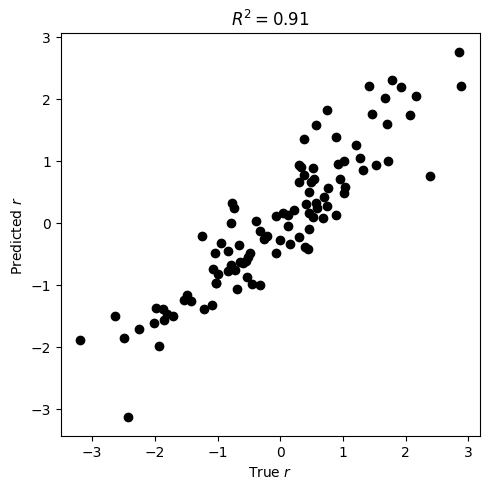

In [11]:
plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(R, newpreds, c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(new_r2_contrastivereg, 2)) + "$")

plt.tight_layout()
plt.show()

In [12]:
# check random seed
sedmodel = LinearCRBZ()

# Fit model
sedmodel.fit(X, Y, R, d,seed=123)

# Make predictions on training data
sedpreds = sedmodel.predict(X)

# calculate difference
print('==S==')
print(sedmodel.S)
print('==W==')
print(sedmodel.W)
print('==beta==')
print(sedmodel.beta)
print('==self.sigma_sq==')
print(sedmodel.sigma_sq)
print('==tau_sq==')
print(sedmodel.tau_sq)
print('==preds==')
print(sedpreds)

Step: 0               Log marginal lik.: -6457.38
Step: 200             Log marginal lik.: -1377.13
Step: 400             Log marginal lik.: -1038.19
Step: 600             Log marginal lik.: -923.93
Step: 800             Log marginal lik.: -871.03
Step: 1000            Log marginal lik.: -841.88
Step: 1200            Log marginal lik.: -823.16
Step: 1400            Log marginal lik.: -809.34
Step: 1600            Log marginal lik.: -797.98
Step: 1800            Log marginal lik.: -788.09
Step: 2000            Log marginal lik.: -779.26
Step: 2200            Log marginal lik.: -771.21
Step: 2400            Log marginal lik.: -763.48
Step: 2600            Log marginal lik.: -754.73
Step: 2800            Log marginal lik.: -744.65
Step: 3000            Log marginal lik.: -732.47
Step: 3200            Log marginal lik.: -715.87
Step: 3400            Log marginal lik.: -691.7
Step: 3600            Log marginal lik.: -662.45
Step: 3800            Log marginal lik.: -629.35
Step: 4000        

In [13]:
# difference
print(abs(newmodel.S) - abs(sedmodel.S))
print(abs(newmodel.W) - abs(sedmodel.W))
print(abs(newmodel.beta) - abs(sedmodel.beta))
print(newmodel.sigma_sq - sedmodel.sigma_sq)
print(newmodel.tau_sq - sedmodel.tau_sq)
print(max(sedpreds - newpreds))

[[0. 0.]]
[[0. 0.]]
[[0.]]
[0.]
[0.]
0.0


0.9110381636464159


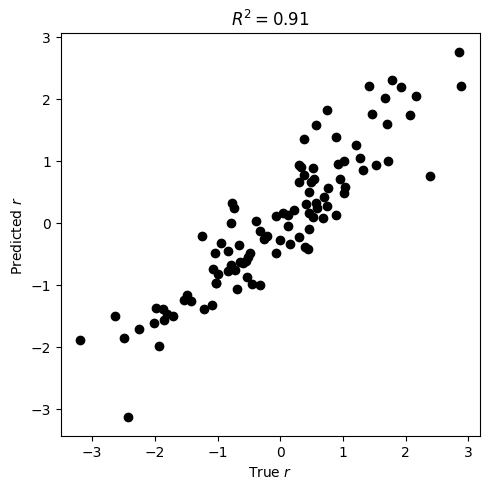

In [14]:
_, _, new_r2_contrastivereg, _, _ = linregress(R.squeeze(), newpreds)
print(new_r2_contrastivereg)

plt.figure(figsize=(5, 5))
plt.subplot()
plt.scatter(R, newpreds, c="black")
plt.xlabel(r"True $r$")
plt.ylabel(r"Predicted $r$")
plt.title(r"$R^2 = " + str(round(new_r2_contrastivereg, 2)) + "$")

plt.tight_layout()
plt.show()